In [60]:
import numpy as np
import sys
from matplotlib import pyplot as plt
from matplotlib import colors

np.random.seed(1)

This minigame is recommended exercise 5.12 of the book "Reinforcement Learning: An introduction" by Sutton & Barro.

# Building the game

In [ ]:
def create_racetrack():

    grid = np.zeros((40, 30))

    # Start line
    for j in range(grid.shape[1]):
        grid[grid.shape[0] - 1][j] = 1

    # Finish line
    for i in range(1, 10):
        grid[i][-1] = 2

    # Left side shape
    for i in range(grid.shape[0] - 5): # Do not touch the bottom 5 rows (Start position)
        left_limit = np.random.normal(5, 1) # On average the leftmost 5 squares are out of map
        for j in range(int(left_limit)):
            grid[i][j] = 3

    # Right side shape
    for i in range(10, grid.shape[0] - 5): # The top 10 rows are reserved for the finish line
        right_limit = np.random.normal(7, 1) # On average the rightmost 7 squares are out of the map 
        for j in range(int(right_limit)):
                grid[i][grid.shape[1] - j - 1] = 3

    # Bounds around the map
    for i in range(grid.shape[1]):
        grid[0][i] = 3
    for i in range(5):
        grid[grid.shape[0] - i - 1][0] = 3
        grid[grid.shape[0] - i - 1][-1] = 3

In [65]:
class CarGame:

    def __init__(self):

        self.grid = create_racetrack() 
        self.respawn()
        
    
    def respawn(self):
        self.current_row = self.grid.shape[0] - 1 
        self.current_col = np.random.randint(0, 30) # Start anywhere on the starting line
        self.vertical_v = 0
        self.horizontal_v = 0

    def get_actions(self):
        possible_action_pairs = []

        for vertical_increment in range(-1, 2):
            for horizontal_increment in range(-1, 2):
                if self.is_legal_action(vertical_increment, horizontal_increment):
                    possible_action_pairs.add((vertical_increment, horizontal_increment))
        
        return possible_action_pairs
    
    def is_legal_action(self, vertical_increment, horizontal_increment):
        
        # No component can be negative
        if((self.vertical_v + vertical_increment < 0) or (self.horizontal_v + horizontal_increment < 0)):
            return False
        
        # No component can be 5 or more
        if ((self.vertical_v + vertical_increment >= 5) or (self.horizontal_v + horizontal_increment >= 5)):
            return False
        
        # The two components cannot both be 0
        if ((self.vertical_v + vertical_increment == 0) and (self.horizontal_v + horizontal_increment == 0)):
            return False
        
        return True
    
    def update_position()

In [66]:
car_game = CarGame()
np.savetxt("sample_grid.txt", car_game.grid, fmt="%d")

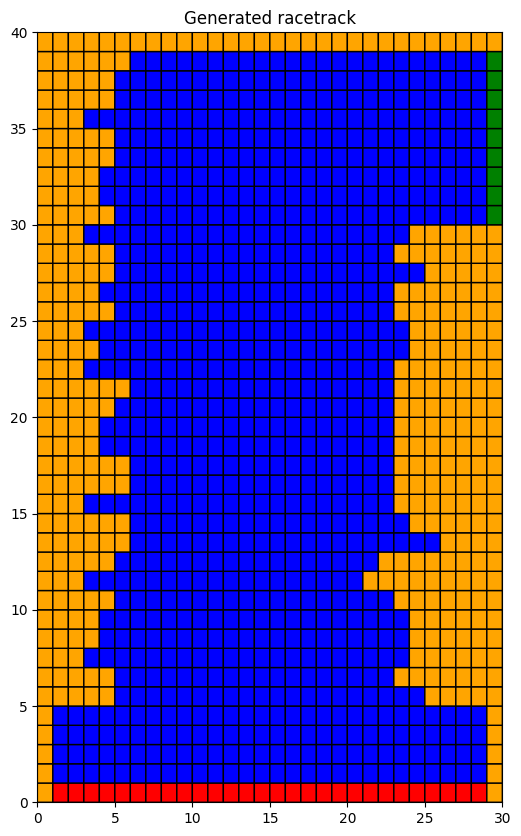

In [71]:
cmap = colors.ListedColormap(['blue','red', 'green', 'orange'])
plt.figure(figsize=(6,10))
plt.pcolor(car_game.grid[::-1],cmap=cmap,edgecolors='k', linewidths=1)
plt.title("Generated racetrack")
plt.show()

# On-policy first visit MC control

In [ ]:
def on_policy_first_visit_MC_control